### Importing libraries

In [29]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

### Percpetron Class

In [30]:
class Perceptron:
    def __init__(self,eta:float=None,epochs:int=None):
        self.weights = np.random.randn(3)*1e-4 # initialize the weights with small random values 
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n {self.weights}")
        self.eta = eta
        self.epochs = epochs

    #calculate Z values     
    def _z_outcome(self,input,weights):
        return np.dot(input,weights)

    #calculate the activation
    def activation_function(self,z):
        return np.where(z>0,1,0)

    # function for fitting/training the model(perceptron)
    def fit(self,X,y):
        self.X = X
        self.y = y

        # adding bias to the input data so that it becomes a learnable variable
        X_with_bias= np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X with bias :\n{X_with_bias}")

        # iterating through the epochs  
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)

            z= self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted values after forward pass \n{y_hat}")

            self.error = self.y-y_hat# calulate the error
            print(f"Error:\n{self.error}")  

            self.weights += self.eta * np.dot(X_with_bias.T,self.error) # weigths updation rule (increase the weights from gradually from small values)
            print(f"Updated weights after epoch:\n {epoch+1}/{self.epochs} :\n {self.weights}")
            print("##"*10)

    def predict(self,X):
        X_with_bias= np.c_[X,-np.ones((len(X),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")

    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)

    def save(self,filename,model_dir= None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)

    def load(self,filepath):
        return joblib.load(filepath)
        
        
    

### Preparing the data by segregating the target and feature

In [31]:
# prepare data by segregating the target and feature columns
def prepare_data(df,target_col = "y"):
    X = df.drop("y",axis=1)

    y = df[target_col]

    return X,y

### Initiating a AND gate dataset

In [32]:
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1],
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [33]:
X,y = prepare_data(df_AND)
ETA = 0.1 ## variying between 0 and 1
EPOCHS = 10
model_and = Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(X,y)

_= model_and.total_loss()

initial weights before training: 
 [ 1.50610083e-04  8.98575341e-05 -9.12422199e-05]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted values after forward pass 
[1 1 1 1]
Error:
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch:
 1/10 :
 [-0.09984939 -0.09991014  0.29990876]
####################
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass 
[0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch:
 2/10 :
 [1.50610083e-04 8.98575341e-05 1.99908758e-01]
####################
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass 
[0 0 0 0]
Error:
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch:
 3/10 :
 [0.10015061 0.10008986 0.09990876]
####################
--------------------
for epoch >> 3
--------------------
Pre

### Saving the Model

In [34]:
model_and.save(filename="and.model")

### Reloading and running the model 

In [35]:
reload_and = Perceptron().load(filepath="model/and.model")

In [36]:
reload_and.predict(X =[[1,0]])

array([0])

### Initiating a OR gate dataset

In [15]:
OR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1],
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
X,y = prepare_data(df_OR)
ETA = 0.1 ## variying between 0 and 1
EPOCHS = 10
model_OR = Perceptron(eta=ETA,epochs=EPOCHS)
model_OR.fit(X,y)

_= model_OR.total_loss()

initial weights before training: 
 [-1.71496583e-04  1.50263958e-04 -2.79628770e-05]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted values after forward pass 
[1 1 0 1]
Error:
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch:
 1/10 :
 [ 9.98285034e-02  1.50263958e-04 -2.79628770e-05]
####################
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass 
[1 1 1 1]
Error:
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch:
 2/10 :
 [0.0998285  0.00015026 0.09997204]
####################
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass 
[0 0 0 1]
Error:
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch:
 3/10 :
 [ 0.1998285   0.10015026 -0.10002796]
####################
--------------------
for epoch >> 3
--------------------


In [37]:
model_and.save(model_dir="model_or",filename="or.model")

### Initiating a XOR gate dataset

In [39]:
XOR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0],
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [85]:
X,y = prepare_data(df_XOR)
ETA = 0.1 ## variying between 0 and 1
EPOCHS = 10
model_XOR = Perceptron(eta=ETA,epochs=EPOCHS)
model_XOR.fit(X,y)

_= model_XOR.total_loss()

initial weights before training: 
 [-3.42324357e-05  2.60299345e-05  4.89466425e-05]
X with bias :
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted values after forward pass 
[0 0 0 0]
Error:
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch:
 1/10 :
 [ 0.09996577  0.10002603 -0.19995105]
####################
--------------------
for epoch >> 1
--------------------
Predicted values after forward pass 
[1 1 1 1]
Error:
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch:
 2/10 :
 [-3.42324357e-05  2.60299345e-05  4.89466425e-05]
####################
--------------------
for epoch >> 2
--------------------
Predicted values after forward pass 
[0 0 0 0]
Error:
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch:
 3/10 :
 [ 0.09996577  0.10002603 -0.19995105]
####################
--------------------
for epoch >> 3
------------------

In [41]:
model_XOR.save("xor.model")

### Method for making and saving plots

In [46]:
def save_plot(df,model,filename ="plot.png",plot_dir ="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter",x="x1",y="x2",c="y",s=100,cmap="coolwarm")
        plt.axhline(y=0,color="black",linestyle ="--",linewidth=1)
        plt.axvline(x=0,color="black",linestyle ="--",linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)

    def _plot_decision_regions(X,y,classifier,resolution=0.02):
        colors = ("cyan","lightgreen")
        cmap = ListedColormap(colors)

        X= X.values
        x1= X[:,0]
        x2= X[:,1]

        x1_min,x1_max = x1.min()-1,x1.max()+1
        x2_min,x2_max = x2.min()-1,x2.max()+1

        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange( x2_min,x2_max,resolution))
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())

        plt.plot()
        
    X,y = prepare_data(df)
    _create_base_plot(df)
    _plot_decision_regions(X,y,model)

    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,filename)
    plt.savefig(plot_path)

#### Plot for OR Gate 

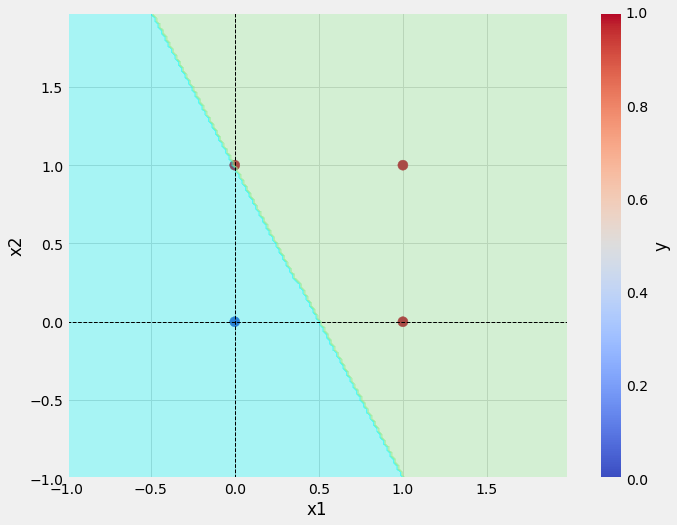

In [48]:
save_plot(df_OR,model_OR,filename ="plot_or.png",plot_dir ="plots")

#### Plot for AND Gate 

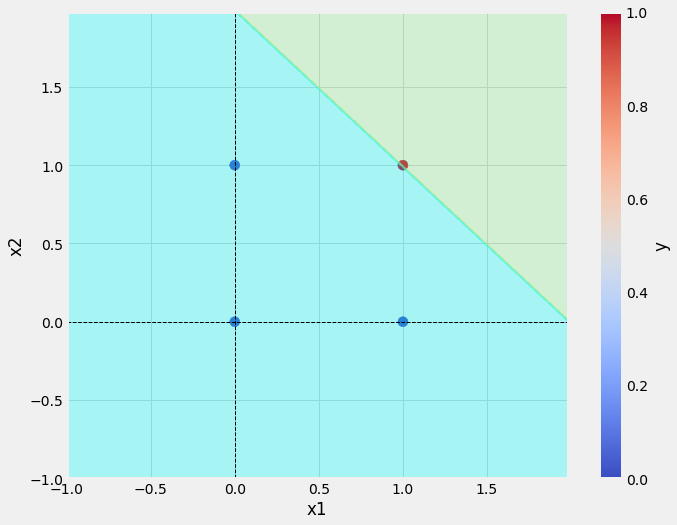

In [82]:
save_plot(df_AND,model_and,filename ="plot_and.png",plot_dir ="plots")

#### Plot for XOR Gate 

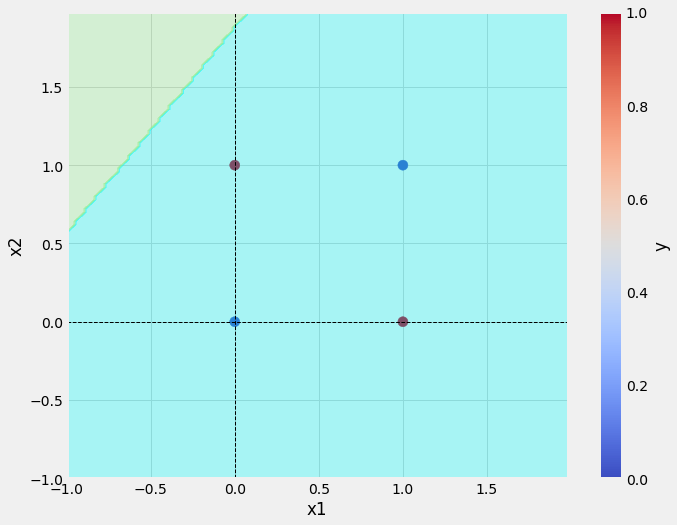

In [86]:
save_plot(df_XOR,model_XOR,filename ="plot_XOR.png",plot_dir ="plots")